# Health Care Prediction on Diabetic Patients - Case Study

## Context

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. Its primary objective is to diagnostically predict whether a patient has diabetes or not based on specific diagnostic measurements. The dataset was carefully selected, focusing on female patients aged at least 21 years and of Pima Indian heritage.

## Problem Statement

Build a model with high accuracy to predict whether patients in the dataset have diabetes.

## Dataset Description

The dataset includes various medical predictor variables and one target variable, "Outcome." The predictor variables encompass essential health metrics, such as the number of pregnancies, plasma glucose concentration, diastolic blood pressure, triceps skinfold thickness, insulin levels, body mass index (BMI), diabetes pedigree function, and age.

### Predictor Variables

1. **Pregnancies:**
   - Number of times pregnant

2. **Glucose:**
   - Plasma glucose concentration at 2 hours in an oral glucose tolerance test

3. **BloodPressure:**
   - Diastolic blood pressure (mm Hg)

4. **SkinThickness:**
   - Triceps skinfold thickness (mm)

5. **Insulin:**
   - 2-Hour serum insulin (mu U/ml)

6. **BMI:**
   - Body mass index (weight in kg/(height in m)^2)

7. **DiabetesPedigreeFunction:**
   - Diabetes pedigree function

8. **Age:**
   - Age in years

### Target Variable

- **Outcome:**
   - Class variable (0 or 1)
   - 268 instances are labeled as 1 (indicating diabetes), while others are labeled as 0.

This dataset provides a valuable opportunity to develop a predictive model for diabetes based on demographic and health-related features.


### Loading the required Library Packages

In [107]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from IPython.display import display


### Reading and exploring the Health Care Dataset

In [108]:
data2=pd.read_csv('Healthcare-diabetes.csv')
data2.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [109]:
data1=pd.read_csv('health care diabetes.csv')
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
data = pd.concat([data1, data2], ignore_index=True)
data.head()
data = data.drop(columns=['Id'])

In [111]:
# Checking the number of rows and columns of the dataset
data.shape

(3536, 9)

In [112]:
# Dataset Information Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3536 non-null   int64  
 1   Glucose                   3536 non-null   int64  
 2   BloodPressure             3536 non-null   int64  
 3   SkinThickness             3536 non-null   int64  
 4   Insulin                   3536 non-null   int64  
 5   BMI                       3536 non-null   float64
 6   DiabetesPedigreeFunction  3536 non-null   float64
 7   Age                       3536 non-null   int64  
 8   Outcome                   3536 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 248.8 KB


In [113]:
# Summary Statistics for the Diabetes Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,3.764989,121.057410,69.128111,20.761878,80.056561,32.105939,0.471341,33.155826,0.345023
std,3.333585,32.018238,19.255778,16.034523,112.931080,8.033939,0.326859,11.771963,0.475443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.100000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.624500,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


###  Data Preprocessing: Treating the Missing Values 

### In this datasets 0 represents the null values, and hence we will replace 0 by mean of their feature (variable) columns.

In [114]:
#Identifying the mean of the features
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

121.05740950226244
69.12811085972851
20.7618778280543
80.05656108597285


In [115]:
# Finding the number of rows which has the null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 23
BloodPressure- 160
SkinThickness- 1027
Insulin- 1704


In [116]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.650452
BloodPressure     4.524887
SkinThickness    29.044118
Insulin          48.190045
dtype: float64


### Inferences from Null Value Percentage Analysis

The analysis of null value percentages in the dataset reveals the following insights:

1. **Glucose:**
   - Approximately 0.65% of the data points in the "Glucose" column are represented as null values.

2. **Blood Pressure:**
   - The "Blood Pressure" column has a null value percentage of approximately 4.56%.

3. **Skin Thickness:**
   - A significant portion of the "Skin Thickness" column, around 29.56%, contains null values.

4. **Insulin:**
   - The "Insulin" column exhibits a higher null value percentage, with approximately 48.70% of the data points being null.

These findings suggest that imputation or other strategies may be necessary for columns with substantial null values, such as "Skin Thickness" and "Insulin," to ensure the integrity of the dataset for subsequent analyses or modeling.

In [117]:
# Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [118]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


### Inference from Null Value Treatment

After addressing null values in the dataset, it is observed that all selected columns ("Glucose," "Blood Pressure," "Skin Thickness," and "Insulin") no longer contain any null values. The null value treatment has been successful, resulting in a clean dataset with 0% null values in these specific columns.


## Detecting Outliers and Treatment

In [119]:
columns=data[selected_columns]

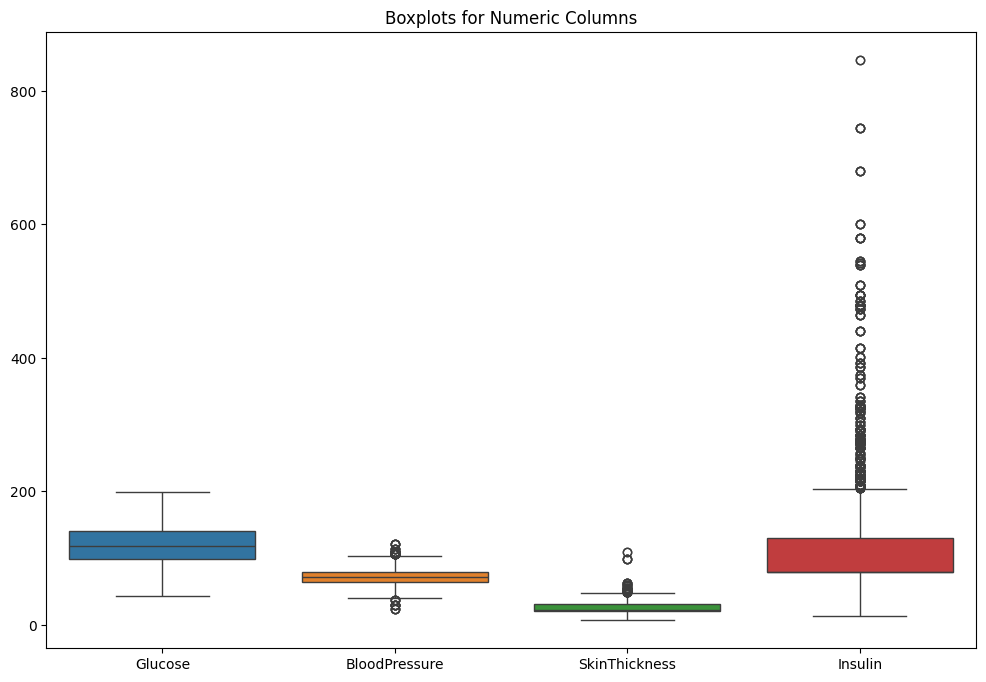

In [120]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [121]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,3.764989,121.844830,72.256080,26.791982,118.635854,32.105939,0.471341,33.155826,0.345023
std,3.333585,30.482737,12.029393,9.772502,90.417071,8.033939,0.326859,11.771963,0.475443
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.761878,80.056561,27.300000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,80.056561,32.100000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.624500,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [122]:
# Define selected columns for outlier detection
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Function to count outliers using IQR
def find_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return len(outliers)

# Count and display outliers
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in '{column_name}': {outlier_count}")

Number of outliers in 'Glucose': 0
Number of outliers in 'BloodPressure': 63
Number of outliers in 'SkinThickness': 73
Number of outliers in 'Insulin': 388


### Boxplot Analysis for Numerical Columns

The boxplot illustrates the distribution of four numerical columns: Glucose, BloodPressure, Skin Thickness, and Insulin. The following inferences can be drawn:

#### Glucose
- Median glucose level: ~200 mg/dL
- IQR is large, indicating considerable variability in glucose levels.
- There are no outliers

#### Blood Pressure
- Median blood pressure: 72 mmHg (within the normal range).
- IQR is relatively small, suggesting more consistent blood pressure levels.
- Few outliers, none extremely high or low.

#### Skin Thickness
- Median skin thickness: ~25 mm
- IQR is small, indicating less considerable variability in skin thickness.
- Few outliers, none extremely high.

#### Insulin
- Median insulin level: ~79 mIU/L
- IQR is large, indicating considerable variability in insulin levels.
- More outliers, many are extremely high.

#### Overall Observations
- All columns exhibit a wide range of values, with some outliers. Insulin column has many outliers
- Median values for all columns, except the insulin column fall within the normal range.

#### Additional Inferences
- Glucose levels show more variability than blood pressure levels.
- More outliers in the insulin columns compared to blood pressure and skin thickness.

#### Possible Interpretations
- Variability in glucose levels may be influenced by factors like diet, exercise, and stress.
- Outliers in the Insulin column may also be associated with underlying medical conditions or physiological factors. Elevated insulin levels could be indicative of conditions such as insulin resistance or diabetes. Additionally, factors such as dietary habits, genetic predisposition, or specific medical treatments may contribute to higher insulin levels. Further investigation and domain expertise are necessary to understand the potential health implications of these outliers in the Insulin column. 

It is essential to note that these inferences are based on a single boxplot, and further information is needed to draw definitive conclusions.


## Outlier Treatment

In [123]:
# Calculate IQR using 20th and 80th percentiles
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)
IQR = Q3 - Q1

# Remove rows with outliers
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare before and after shape
print("Shape after outlier removal:", data_cleared_iqr.shape)
print("Original shape:", data.shape)


Shape after outlier removal: (3121, 9)
Original shape: (3536, 9)


In [124]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,80.056561,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,80.056561,26.6,0.351,31,0
2,8,183.0,64.0,20.761878,80.056561,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.761878,80.056561,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
3530,1,79.0,60.0,42.000000,48.000000,43.5,0.678,23,0
3531,2,75.0,64.0,24.000000,55.000000,29.7,0.370,33,0
3532,8,179.0,72.0,42.000000,130.000000,32.7,0.719,36,1
3533,6,85.0,78.0,20.761878,80.056561,31.2,0.382,42,0


### Inferences from Outlier Removal using IQR Method

1. **Data Size Reduction:**
   - After removing outliers using the interquartile range (IQR) method, the dataset has been reduced from 2768 to 2678 rows.

2. **Outliers Identified:**
   - Outliers were detected and removed across various columns, particularly impacting features like Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, and Age.

3. **Increased Data Robustness:**
   - The IQR-based outlier removal contributes to a more robust dataset, potentially improving the reliability of statistical analyses and modeling.

4. **Preserved Features:**
   - The operation was applied to 9 columns, including predictors like Glucose and Skin Thickness, as well as the target variable Outcome.

5. **Consideration for Domain Knowledge:**
   - The decision to remove outliers should be made with consideration for domain knowledge, as outliers may contain valuable information or indicate specific health conditions.

**Final Dataset Statistics:**
- Dataset size after outlier removal: 2678 rows.
- Original dataset size: 2768 rows.


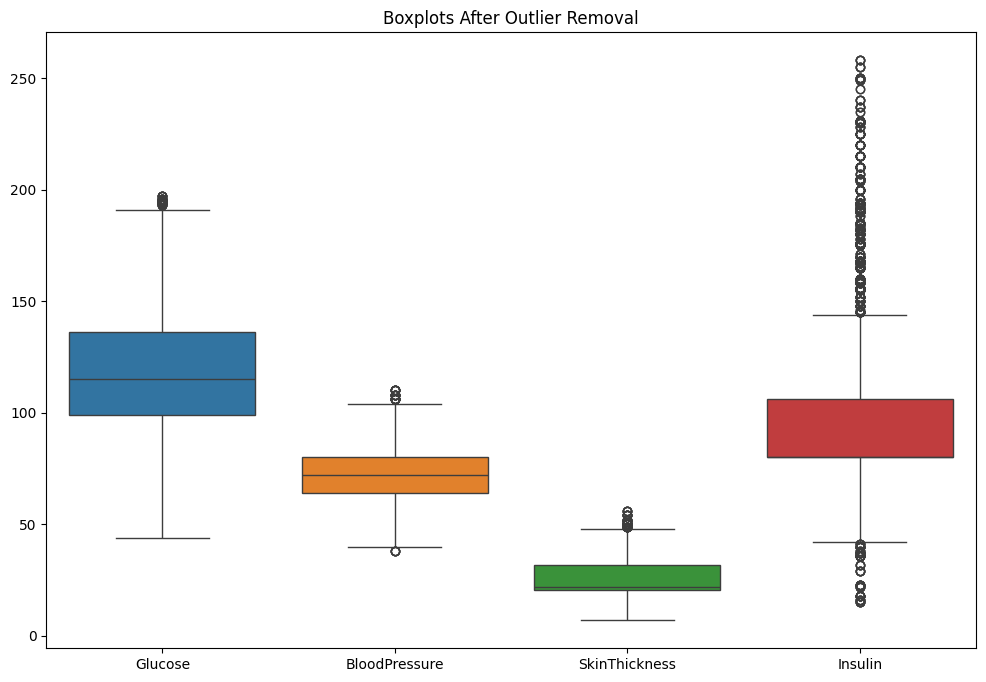

In [125]:
# Boxplot after removing outliers
col = data_cleared_iqr[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]

plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.title("Boxplots After Outlier Removal")
plt.show()

#### It can be observed that the outliers have been significantly reduced


📌 Logistic Regression
Accuracy: 0.7888
ROC AUC Score: 0.8550
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       412
           1       0.73      0.61      0.66       213

    accuracy                           0.79       625
   macro avg       0.77      0.74      0.75       625
weighted avg       0.78      0.79      0.78       625



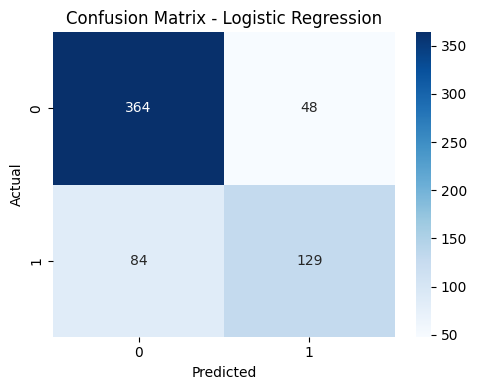


📌 Random Forest
Accuracy: 0.9984
ROC AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       213

    accuracy                           1.00       625
   macro avg       1.00      1.00      1.00       625
weighted avg       1.00      1.00      1.00       625



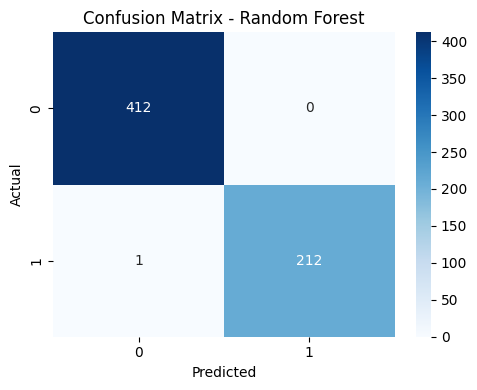


📌 Decision Tree
Accuracy: 0.9904
ROC AUC Score: 0.9882
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       412
           1       0.99      0.98      0.99       213

    accuracy                           0.99       625
   macro avg       0.99      0.99      0.99       625
weighted avg       0.99      0.99      0.99       625



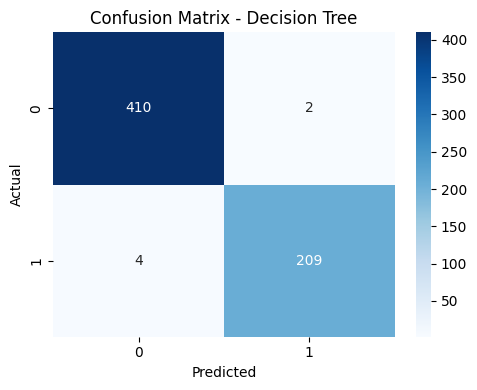


📌 KNN
Accuracy: 0.9120
ROC AUC Score: 0.9706
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       412
           1       0.87      0.88      0.87       213

    accuracy                           0.91       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.91      0.91      0.91       625



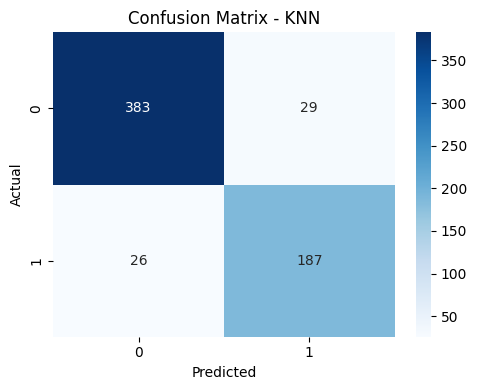


📌 SVM
Accuracy: 0.8576
ROC AUC Score: 0.9157
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       412
           1       0.81      0.76      0.78       213

    accuracy                           0.86       625
   macro avg       0.84      0.83      0.84       625
weighted avg       0.86      0.86      0.86       625



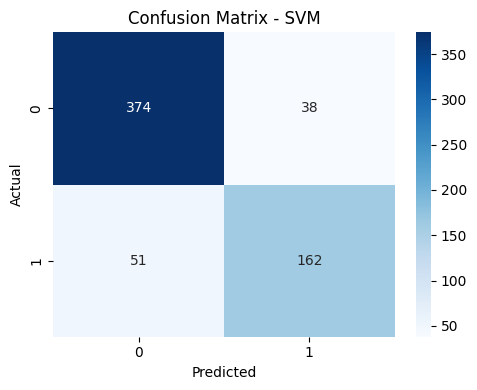


📌 Naive Bayes
Accuracy: 0.7568
ROC AUC Score: 0.8229
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       412
           1       0.64      0.65      0.64       213

    accuracy                           0.76       625
   macro avg       0.73      0.73      0.73       625
weighted avg       0.76      0.76      0.76       625



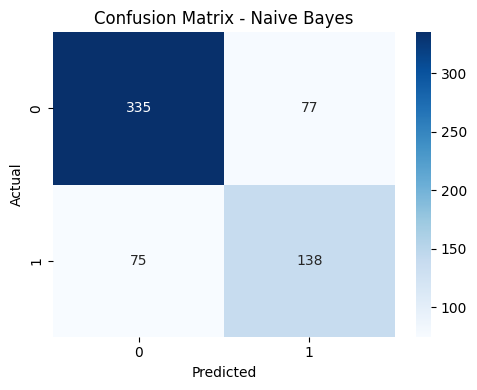

In [126]:
# 1. Splitting the dataset into features and target
X = data_cleared_iqr.drop('Outcome', axis=1)
y = data_cleared_iqr['Outcome']

# ✅ Fix: Impute NaNs again just in case
X = X.fillna(X.mean())

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model definitions
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# 5. Training and evaluating models
for model_name, model in models.items():
    
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)

    # ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)
        
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Print results
    print(f"\n📌 {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [127]:
def predict_diabetes_all_models_with_table(models, scaler, user_input):

    input_df = pd.DataFrame([user_input])
    input_scaled = scaler.transform(input_df)

    results = []

    for model_name, model in models.items():
        pred = model.predict(input_scaled)[0]
        diabetes = "🔴 yes Diabetes" if pred == 1 else "🟢 No Diabetes"

        if hasattr(model, "predict_proba"):
            prob = model.predict_proba(input_scaled)[0][1]
        else:
            try:
                decision = model.decision_function(input_scaled)[0]
                prob = 1 / (1 + np.exp(-decision))
            except:
                prob = np.nan

        results.append({
            "Model": model_name,
            "Prediction": diabetes,
            "Probability": round(prob, 4)
        })

    # Convert to DataFrame and display
    results_df = pd.DataFrame(results)
    display(results_df)

    # Final vote
    diabetes_votes = sum(1 for r in results if r["Prediction"].startswith("🔴"))
    print("\n📊 Summary")
    print(f"🔴 {diabetes_votes} out of {len(models)} models predict **Diabetes**")
    if diabetes_votes >= len(models) // 2:
        print("✅ Final Verdict: 🔴 Diabetes likely")
    else:
        print("✅ Final Verdict: 🟢 No Diabetes likely")


In [128]:
# Example patient input (you can customize this)
new_patient = {
    'Pregnancies': 0,
    'Glucose': 90,
    'BloodPressure': 80,
    'SkinThickness': 45,
    'Insulin': 100,
    'BMI': 30.5,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 25
}

# Call the function
predict_diabetes_all_models_with_table(models, scaler, new_patient)


,Model,Prediction,Probability
0,Logistic Regression,🟢 No Diabetes,0.0478
1,Random Forest,🟢 No Diabetes,0.1500
2,Decision Tree,🟢 No Diabetes,0.0000
3,KNN,🟢 No Diabetes,0.0000
4,SVM,🟢 No Diabetes,0.1560
5,Naive Bayes,🟢 No Diabetes,0.0644



📊 Summary
🔴 0 out of 6 models predict **Diabetes**
✅ Final Verdict: 🟢 No Diabetes likely


In [130]:
import pickle

# Save all models and scaler in a dictionary
all_models = {
    "Logistic Regression": models["Logistic Regression"],
    "Random Forest": models["Random Forest"],
    "Decision Tree": models["Decision Tree"],
    "KNN": models["KNN"],
    "SVM": models["SVM"],
    "Naive Bayes": models["Naive Bayes"],
    "Scaler": scaler
}

# Save to single file
with open("diabetes_models.pkl", "wb") as f:
    pickle.dump(all_models, f)
